# Before you start with this Quickstart Notebook

You will need:
* An account in Vectice
* An API key to connect to Vectice
* The Phase Id of the project where you want to log your work

### Important Resources
* Vectice autolog documentation https://api-docs.vectice.com/reference/vectice/autolog/


<div class="alert" style="color: #383d41; background-color: #e2e3e5; border-color: #d6d8db" role="alert">
<b>Automated code lineage:</b> The code lineage functionalities are not covered as part of this QuickStart as they require to first setting up a Git repository.
</div>



---



## What to expect

In this notebook, we will re-use the classical Iris modeling example to demonstrate how you can automatically document in Vectice your assets, such as datasets, models, graphs, and notes, using a few lines of code.

## Install the latest Vectice Python client library

In [11]:
%pip install -q seaborn
%pip install -q scikit-learn
%pip install -q vectice -U
%pip install vectice[autolog]


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
zsh:1: no matches found: vectice[autolog]
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install -i https://test.pypi.org/simple/ vectice==23.4.7.2

Looking in indexes: https://test.pypi.org/simple/
  Obtaining dependency information for vectice==23.4.7.2 from https://test-files.pythonhosted.org/packages/07/82/7f2a232d079651fae40a641ad69cc052711a37f1060305b039ae91b7cdf0/vectice-23.4.7.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 2.0 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: vectice
    Found existing installation: vectice 23.4.7.1
    Uninstalling vectice-23.4.7.1:
      Successfully uninstalled vectice-23.4.7.1

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Get started configuring the Vectice autolog

<div class="alert" style="color: #383d41; background-color: #e2e3e5; border-color: #d6d8db" role="alert">
<b> Important information:</b> The Vectice Autolog feature is presently in its Beta phase, and your feedback is highly valued. It's worth noting that all environments and libraries might not be supported at this stage, and the feature is subject to change and improvements. For detailed information on supported environments and libraries, please consult our Autolog documentation provided below.
</div>

(TO REWORK) **First, we need to authenticate to the Vectice server and Phase ID inside your Quickstart project to specify where to document your work . Before proceeding further:** 

- Click on the key icon in the upper right corner of the Vectice app to create and copy an API key

- Paste the API key in the code below

In [4]:
#import vectice
#from vectice import autolog

#autolog.config(api_token="your-api-key", phase="your-phase-id") #Paste your API key and Phase Id
import vectice
from vectice import autolog

autolog.config(api_token="3xKMWz5Qz.O2aoPrYGR7Z8O49Ddn6X03xKMWz5QzJpvwjkANmLVlBgMWeEyb", phase="PHA-4055") #Paste your API key and Phase Id

Phase '[Step 2] Autolog' successfully retrieved.

For quick access to the Phase in the Vectice web app, visit:
https://app.vectice.com/browse/phase/PHA-4055
Welcome, bdaversa. You`re now successfully connected to Vectice.


**Important information**: Configure autolog at the beginning of your notebook to ensure optimal performance. Failure to do so may result in difficulties capturing assets from your entire notebook, requiring you to rerun cells executed before autolog configuration. Refer to the documentation for more details.

# Auto-Document your work in Vectice
We will prepare an example dataset based on the well-known iris dataset. We will then train a linear regression model using scikit-learn.
As we are doing this work and creating those assets, we will at the end log them in one line of code.
This enables you to document your work as you go, and never forget the data that was used, the models, the code and other artifacts.

Use the following code block to create a local dataset, generate a graph and build a model:

In [5]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]


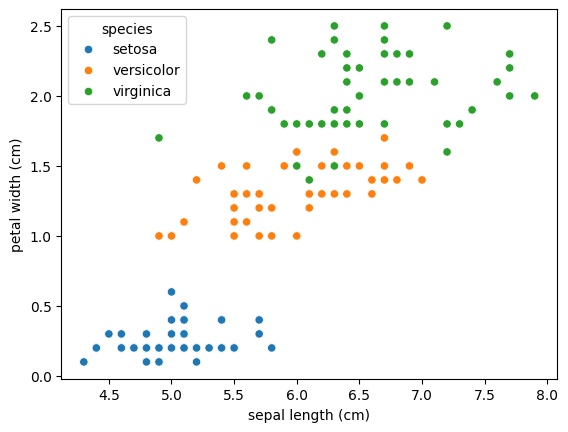

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_iris, x='sepal length (cm)',
                y='petal width (cm)', hue='species')
plt.plot()

#Save your graph to local file to be automatically captured by Vectice 
plt.savefig('Scatter_plot_iris.png') 

**Note**: If you wish for graphs to be automatically captured by the autolog, it is essential to save them.<br> For more information please refer to [documentation of autolog](https://api-docs.vectice.com/reference/vectice/autolog/)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_df, test_df = train_test_split(df_iris, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(train_df[iris.feature_names],train_df["species"])

# Make predictions on the test set
y_pred_test = knn.predict(test_df[iris.feature_names])
y_pred_train = knn.predict(train_df[iris.feature_names])

# Calculate the accuracy score
accuracy_test= accuracy_score(test_df["species"], y_pred_test)
accuracy_train = accuracy_score(train_df["species"], y_pred_train)

**Note**: To link models and metrics using Vectice autolog, ensure each model and its metrics are in the same notebook cell (only scikit metrics are currently supported).<br> For more information please refer to [documentation](https://api-docs.vectice.com/reference/vectice/autolog/) of autolog

## Autolog your entire notebook's assets (Model, Dataframe, Graphs) with in line of code

In [10]:
autolog.notebook(note="My first iteration to Vectice to document iris dataset") #You can add a note to comment what you just logged into Vectice

New Iteration number 21 created.

For quick access to the Iteration in the Vectice web app, visit:
https://app.vectice.com/browse/iteration/ITR-1781
Note logged in iteration 21.
Dataset 'PHA-4055-df_iris' logged in iteration 21.
Model 'PHA-4055-knn' logged in iteration 21.
Graph 'Scatter_plot_iris.png' logged in iteration 21.


#### You have logged your assets inside Vectice in one line of code.<br> 
#### You can click on the iteration link to see your assets inside Vectice and come back to the notebook.
**Note**: Vectice autolog also allows you to log only the content of a notebook cell, please check out our [documentation](https://api-docs.vectice.com/reference/vectice/autolog/) to learn more about the autolog functions and capabilities.<br> 

## 🥇 Congrats! You have learned how to succesfully use Vectice to auto-document your assets in one line of Code.<br> Easy right?<br>
#### You can proceed back to the Vectice app continue documenting your work.
